# **Setting up**

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

stocks=pd.read_csv("../input/financial-tweets/stocks_cleaned.csv")
stock_data=pd.read_csv("../input/financial-tweets/stockerbot-export.csv", error_bad_lines=False)
stock_data.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2363441611.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  stock_data=pd.read_csv("../input/financial-tweets/stockerbot-export.csv", error_bad_lines=False)
Skipping line 731: expected 8 fields, saw 13
Skipping line 2836: expected 8 fields, saw 15
Skipping line 3058: expected 8 fields, saw 12
Skipping line 3113: expected 8 fields, saw 12
Skipping line 3194: expected 8 fields, saw 17
Skipping line 3205: expected 8 fields, saw 17
Skipping line 3255: expected 8 fields, saw 17
Skipping line 3520: expected 8 fields, saw 17
Skipping line 4078: expected 8 fields, saw 17
Skipping line 4087: expected 8 fields, saw 17
Skipping line 4088

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


# **Data cleaning**

# Missing data

In [2]:
#what type of data is missing 
#the number of missing data
missing_values_count = stock_data.isnull().sum()
missing_values_count


id                  0
text                0
timestamp           0
source              0
symbols             0
company_names       1
url              6369
verified            0
dtype: int64

In [3]:
#the only column with missing data is 'url'

In [4]:
total_cells = np.product(stock_data.shape)
print(total_cells)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

226112
2.8171879422587036


In [5]:
#drop rows with missing values
stock_data.dropna()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
...,...,...,...,...,...,...,...,...
28256,1019730035576623100,Exxon Once a ‘Perfect Machine’ Is Running Dry ...,Wed Jul 18 23:46:00 +0000 2018,danhyder,XOM,Exxon Mobil Corporation,https://twitter.com/i/web/status/1019730035576...,False
28260,1019730115524288500,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,Wed Jul 18 23:46:19 +0000 2018,keizai_toushi17,BTC,Bitcoin,http://keizai-toushi-navi.com/?p=26838,False
28261,1019730115805184000,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,Wed Jul 18 23:46:19 +0000 2018,iad81,BTC,Bitcoin,https://twitter.com/CRYPTOVERLOAD/status/10178...,False
28262,1019730117252341800,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,Wed Jul 18 23:46:20 +0000 2018,O8viWMyrCV6cBOZ,BTC,Bitcoin,http://true.velvet.jp/monexx/archives/2357,False


In [6]:
unverified_count = (stock_data['verified'] == False).value_counts()
unverified_count
total_unverified = unverified_count.sum()
# percent of data that is unverified
percent_unverified = (total_unverified/total_cells) * 100
print(percent_unverified)
#filter all rows with unverified data
stock_data = stock_data[stock_data['verified'] == True]
stock_data

    


12.5


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
...,...,...,...,...,...,...,...,...
27959,1019725195492249600,RT @LauraJKeller: See ya'll one more time toni...,Wed Jul 18 23:26:46 +0000 2018,HaidiLun,JPM,JPMorgan Chase & Co.,NaN,True
27973,1019725521645703200,$SAN did not have a good quarter and it was su...,Wed Jul 18 23:28:04 +0000 2018,jimcramer,SAN,Banco Santander,https://twitter.com/Marineteam21/status/101971...,True
28084,1019727809995034600,$AMAT bulls score big overnight https://t.co/C...,Wed Jul 18 23:37:10 +0000 2018,petenajarian,AMAT,Applied Materials,http://zpr.io/6XWjS,True
28120,1019728263600595000,$AMAT bulls score big overnight https://t.co/O...,Wed Jul 18 23:38:58 +0000 2018,jonnajarian,AMAT,Applied Materials,http://zpr.io/6XWjS,True


# Unverified tweets

# Special characters

In [7]:
#drop rows with Japanese characters
def contain_japanese(check_str):
    for ch in check_str:
        if ("\u3040" <= ch and ch <= "\u309F") or ("\u30A0" <= ch and ch <= "\u30FF") or ("\u4300" <= ch and ch <= "\u9faf"):
            return True
    return False
stock_data = stock_data[~stock_data['text'].apply(contain_japanese)].reset_index()
stock_data

,index,id,text,timestamp,source,symbols,company_names,url,verified
0,0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
...,...,...,...,...,...,...,...,...,...
357,27959,1019725195492249600,RT @LauraJKeller: See ya'll one more time toni...,Wed Jul 18 23:26:46 +0000 2018,HaidiLun,JPM,JPMorgan Chase & Co.,NaN,True
358,27973,1019725521645703200,$SAN did not have a good quarter and it was su...,Wed Jul 18 23:28:04 +0000 2018,jimcramer,SAN,Banco Santander,https://twitter.com/Marineteam21/status/101971...,True
359,28084,1019727809995034600,$AMAT bulls score big overnight https://t.co/C...,Wed Jul 18 23:37:10 +0000 2018,petenajarian,AMAT,Applied Materials,http://zpr.io/6XWjS,True
360,28120,1019728263600595000,$AMAT bulls score big overnight https://t.co/O...,Wed Jul 18 23:38:58 +0000 2018,jonnajarian,AMAT,Applied Materials,http://zpr.io/6XWjS,True


# **Data analysis**

# Tweets by company names

In [8]:
company_count= stock_data['company_names'].value_counts().head(10)
company_count

Cisco Systems                      12
eBay Inc.                          10
Biogen Inc.                         9
Envision Healthcare Corporation     9
JPMorgan Chase & Co.                8
Northern Trust Corporation          8
American Airlines Group Inc.        8
Alphabet Inc.                       7
Hilton Worldwide Holdings Inc.      7
Morgan Stanley                      7
Name: company_names, dtype: int64

Text(0.5, 1.0, 'Tweets numbers of the 10 most frequently mentioned companies')

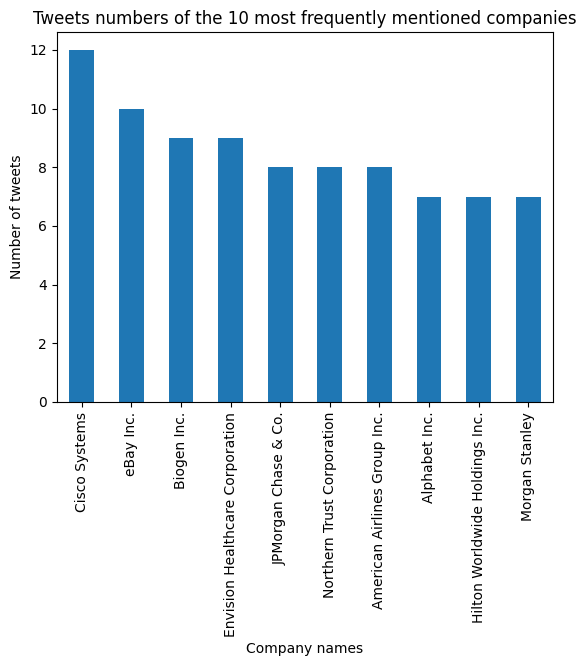

In [9]:
company_count.plot.bar()
plt.ylabel("Number of tweets")
plt.xlabel("Company names")
plt.title("Tweets numbers of the 10 most frequently mentioned companies")

# Tweets by source

In [10]:
source_count= stock_data['source'].value_counts().head(10)
source_count

Benzinga         23
jonnajarian      15
Barchart         13
petenajarian     13
Estimize         13
TheStreet        12
OphirGottlieb    11
eBayNewsroom      9
Reuters           9
MarketSmith       7
Name: source, dtype: int64

Text(0.5, 1.0, 'Tweets numbers of the 10 most frequently publishing sources')

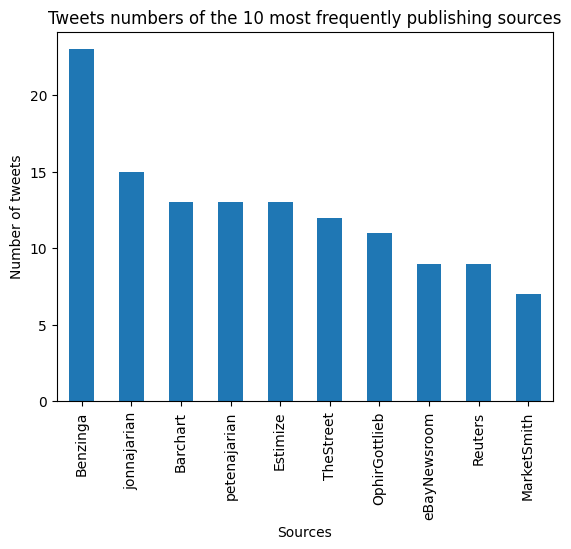

In [11]:
source_count.plot.bar()
plt.ylabel("Number of tweets")
plt.xlabel("Sources")
plt.title("Tweets numbers of the 10 most frequently publishing sources")

In [12]:
cnt = {}
all_names = stock_data['company_names'].unique()
for company_names in all_names:
    cnt[company_names] = {}
    
def wordcnt(row):
    a = row.text
    a = a.split()
    for word in a:
        #print(cnt[row['company_names']][word]
        if not word in cnt[row['company_names']]:
            cnt[row['company_names']][word] = 1
        else:
            cnt[row['company_names']][word] += 1
    return row
stock_data.apply(wordcnt, axis ='columns')

cnt['Cisco Systems']


{'SCOOP:': 6,
 'Amazon': 8,
 'has': 8,
 'gone': 6,
 'on': 9,
 'the': 6,
 'record': 6,
 'to': 14,
 'deny': 6,
 'that': 8,
 'it': 8,
 'will': 8,
 'challenge': 8,
 'Cisco': 10,
 'by': 9,
 'selling': 7,
 'network': 6,
 'switches': 6,
 'other': 6,
 'busi…': 1,
 'https://t.co/S3koeNjq0j': 1,
 'RT': 6,
 '@jowens510:': 5,
 'businesses.': 5,
 'h…': 5,
 '$CSCO': 6,
 'stock': 1,
 'now': 1,
 'up': 4,
 '3%': 1,
 'in': 2,
 'after-hours': 1,
 'trading.': 1,
 'Now': 2,
 '3.65%': 2,
 'after': 2,
 'hours': 3,
 'report': 2,
 'denying': 2,
 '$AMZN': 4,
 'current': 2,
 'plans': 2,
 'compete': 2,
 'directly': 2,
 'with': 3,
 'sel…': 1,
 'https://t.co/GZYUKstOzy': 1,
 'Nice': 1,
 'scoop': 1,
 '@MarketWatch': 1,
 'tech': 1,
 'editor': 1,
 '@jowens510': 1,
 'https://t.co/WC1LZljszE': 1,
 'https://t.co/tzaYzlB3EC': 1,
 'Exclusive:': 2,
 'denies': 2,
 'switch': 1,
 'sales': 1,
 'via': 1,
 '@YahooFinance': 1,
 '-': 1,
 '$ANET': 1,
 '@MattRosoff:': 1,
 'swi…': 1,
 'Systems': 1,
 'Inc.': 1,
 '2.49%': 1,
 'After': 1